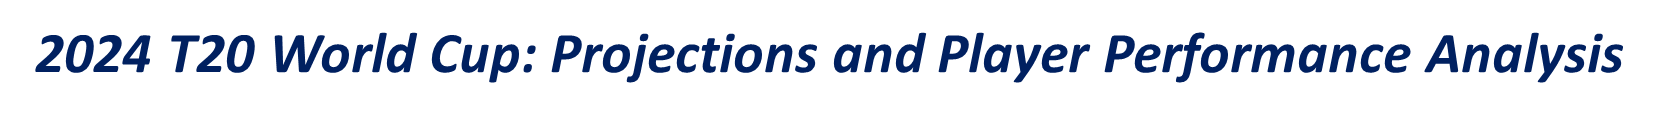

# Data Collection - Cleaning, Wrangling and  Preparation  
**Correcting errors, inconsistencies, and inaccuracies within a dataset.**

**Batting Predictions**

Players -

1. player1 - Virat Kohli
2. player2 - Rohit Sharma
3. player3 - David Warner
4. player4 - Jos Buttler
5. player5 - Glenn Maxwell
6. player6 - Kane Williamson
7. player7 - Shakib Al Hasan

In [1]:
# Virat Kohli data

# Got this data on excel sheet, by get data->From file

import pandas as pd

# Create dataframe
player1 = pd.read_csv('Data player virat.csv', header=None)

# drop the first 2 rows
player1 = player1.iloc[2:]
# Make the first row as header
header_row = player1.iloc[0]

# Exclude the first row that was used as header
player1 = player1.iloc[1:]
player1.columns = header_row

player1

2   Bat1 Runs  BF      SR 4s 6s      Opposition         Ground  Start Date
3     28   28  19  147.36  5  0  v South Africa         Durban    9-Jan-11
4     14   14  12  116.66  2  0   v West Indies  Port of Spain    4-Jun-11
5      4    4   5      80  0  0       v England     Manchester   31-Aug-11
6     15   15  16   93.75  3  0       v England   Eden Gardens   29-Oct-11
7     22   22  21  104.76  0  1     v Australia         Sydney    1-Feb-12
..   ...  ...  ..     ... .. ..             ...            ...         ...
111  62*   62  44   140.9  3  2   v Netherlands         Sydney  10/27/2022
112   12   12  11  109.09  2  0  v South Africa          Perth  10/30/2022
113  64*   64  44  145.45  8  1    v Bangladesh       Adelaide   11/2/2022
114   26   26  25     104  2  0      v Zimbabwe      Melbourne   11/6/2022
115   50   50  40     125  4  1       v England       Adelaide  11/10/2022

[113 rows x 9 columns]

Use 'Tabula' library to extract tables from the PDF and directly have a structured table



In [2]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 51.5 MB/s eta 0:00:00


Function to get the PDF data and extract the tables into an excel sheet

In [3]:
import pandas as pd
import tabula

# Function to extract data and save it to Excel
def extract_and_save_data(file_path, output_file):
    # Read all pages of the PDF file and extract tables into a list of DataFrames
    tables = []
    all_pages = tabula.read_pdf(file_path, pages='all', multiple_tables=True)
    tables.extend(all_pages)

    # Concatenate all tables into a single DataFrame if needed
    combined_df = pd.concat(tables)

    # Export the combined DataFrame to Excel
    combined_df.to_excel(output_file, index=False)

# Path to Rohit Sharma's PDF file
rohit_file_path = 'Rohit.pdf'
rohit_output_file = 'rohit_data.xlsx'
extract_and_save_data(rohit_file_path, rohit_output_file)

# Path to David Warner's PDF file
warner_file_path = 'Warner.pdf'
warner_output_file = 'warner_data.xlsx'
extract_and_save_data(warner_file_path, warner_output_file)

# Path to Jos buttler's PDF file
jos_file_path = 'Jos.pdf'
jos_output_file = 'jos_data.xlsx'
extract_and_save_data(jos_file_path, jos_output_file)

# Path to Glen Maxwell's PDF file
glen_file_path = 'Glen.pdf'
glen_output_file = 'Glen_data.xlsx'
extract_and_save_data(glen_file_path, glen_output_file)

# Path to Kane's PDF file
kane_file_path = 'Kane.pdf'
kane_output_file = 'Kane_data.xlsx'
extract_and_save_data(kane_file_path, kane_output_file)


# Path to Shakib's PDF file
shakib_file_path = 'Shakib.pdf'
shakib_output_file = 'Shakib_data.xlsx'
extract_and_save_data(shakib_file_path, shakib_output_file)

1.   Function to change the xlsx data to a comma separated file for easy usage
2.   Get the dataframes in separate variables




In [4]:
# Lets change the xlsx data to a csv file for easy usage
import pandas as pd


def xlsx_to_csv(data, output):
  df = pd.read_excel(data)
  df.to_csv(output, index=False)
  return df.iloc[:,15:].iloc[5:,:]

warner_xlsx = 'warner_data.xlsx'
rohit_xlsx = 'rohit_data.xlsx'
jos_xlsx = 'jos_data.xlsx'
glen_xlsx = 'Glen_data.xlsx'
kane_xlsx = 'Kane_data.xlsx'
shakib_xlsx = 'Shakib_data.xlsx'

player2 = xlsx_to_csv(rohit_xlsx, 'rohit_csv')
player3 = xlsx_to_csv(warner_xlsx, 'warner_csv')
player4 = xlsx_to_csv(jos_xlsx, 'jos_csv')
player5 = xlsx_to_csv(glen_xlsx, 'glen_csv')
player6 = xlsx_to_csv(kane_xlsx, 'kane_csv')
player7 = xlsx_to_csv(shakib_xlsx, 'shakib_csv')

In [5]:
# Alter dataframe to correct an inconsisteny found in the table

player6 = player6.iloc[:,1:]
player6

Bat1 Runs  BF      SR 4s 6s      Opposition           Ground   Start Date
5   28*   28  20  140.00  1  2  v South Africa         Hamilton  19 Feb 2012
6     6    6   9   66.66  0  0  v South Africa         Auckland  22 Feb 2012
7    10   10  10  100.00  0  0   v West Indies       Lauderhill  30 Jun 2012
8     6    6   5  120.00  1  0   v West Indies       Lauderhill   1 Jul 2012
9    28   28  26  107.69  3  0         v India          Chennai  11 Sep 2012
..  ...  ...  ..     ... .. ..             ...              ...          ...
83    8    8  13   61.53  1  0     v Sri Lanka           Sydney  29 Oct 2022
84   40   40  40     100  3  0       v England         Brisbane   1 Nov 2022
85   61   61  35  174.28  5  3       v Ireland         Adelaide   4 Nov 2022
86   46   46  42  109.52  1  1      v Pakistan           Sydney   9 Nov 2022
87   61   61  52   117.3  4  2         v India  Mount Maunganui  20 Nov 2022

[83 rows x 9 columns]


1. Understand data
2. Using a For loop to convert/format date to datetime
3. Handle missing values in the cells


In [6]:
# Convert dates to datetime
players = [player1, player2, player3, player4, player5, player6, player7]

for idx, df in enumerate(players):
    df['Start Date'] = pd.to_datetime(df['Start Date'])

    # Correct the missing values
    df = df[df['Bat1'] != 'DNB']
    df = df[df['Bat1'] != 'TDNB']

    # Reassign the modified DataFrame to the players list or specific player variable
    if idx == 0:
        player1 = df
    elif idx == 1:
        player2 = df
    elif idx == 2:
        player3 = df
    elif idx == 3:
        player4 = df
    elif idx == 4:
        player5 = df
    elif idx == 5:
        player6 = df
    elif idx == 6:
        player7 = df

In [7]:
# player5


# Radar Chart

1. Take the count of not out of each player
2. This will essentially be used in the radar chart

In [8]:
# Create variables to store counts for each player
player_notout = [0] * len(players)
players_out = [0] * len(players)

# Iterate through each player's data
for idx, player_data in enumerate(players):
    df = pd.DataFrame(player_data)

    # Count rows with asterisks in 'Bat1' column for each player
    asterisk_count = df[df['Bat1'].str.contains('\*', na=False)].shape[0]

    # Calculate total rows for each player
    total_rows = df.shape[0]

    # Assign the counts to respective variables
    player_notout[idx] = asterisk_count
    players_out[idx] = total_rows - asterisk_count

# Print the counts for each player
for idx, (not_out, out) in enumerate(zip(player_notout, players_out), start=1):
    print(f"Player{idx} not out: {not_out}, Player{idx} out: {out}")

Player1 not out: 30, Player1 out: 83
Player2 not out: 17, Player2 out: 126
Player3 not out: 11, Player3 out: 87
Player4 not out: 20, Player4 out: 85
Player5 not out: 14, Player5 out: 84
Player6 not out: 10, Player6 out: 73
Player7 not out: 16, Player7 out: 87


In [9]:
players_out

[83, 126, 87, 85, 84, 73, 87]

Prepare the data for the rest of the models

Have asterisk removed from 'Bat1' column and transform it into numerical

In [10]:
# Prepare the data for the rest of the models
import numpy as np
# Convert dates to datetime
players = [player1, player2, player3, player4, player5, player6, player7]

for idx, df in enumerate(players):
    df['Bat1'] = df['Bat1'].str.replace('*', '')

    # Reassign the modified DataFrame to the players list or specific player variable
    if idx == 0:
        player1 = df
    elif idx == 1:
        player2 = df
    elif idx == 2:
        player3 = df
    elif idx == 3:
        player4 = df
    elif idx == 4:
        player5 = df
    elif idx == 5:
        player6 = df
    elif idx == 6:
        player7 = df


int_columns = ['Bat1', 'Runs', 'BF', 'SR', '4s', '6s']

def safe_convert(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan  # Assign NaN for non-convertible values

# Assuming player1 and player2 are your DataFrames
for col in int_columns:
    player1[col] = player1[col].apply(safe_convert)
    player2[col] = player2[col].apply(safe_convert)
    player3[col] = player3[col].apply(safe_convert)
    player4[col] = player4[col].apply(safe_convert)
    player5[col] = player5[col].apply(safe_convert)
    player6[col] = player6[col].apply(safe_convert)
    player7[col] = player7[col].apply(safe_convert)

<ipython-input-10-2e2631bfd3ac>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Bat1'] = df['Bat1'].str.replace('*', '')


	Player1 - Virat Kohli
 	Player2 - Rohit Sharma
 	Player3 - David Warner
 	Player4 - Jos Buttler
 	Player5 - Glenn Maxwell
 	Player6 - Kane Williamson
 	Player7 - Shakib Al Hasan



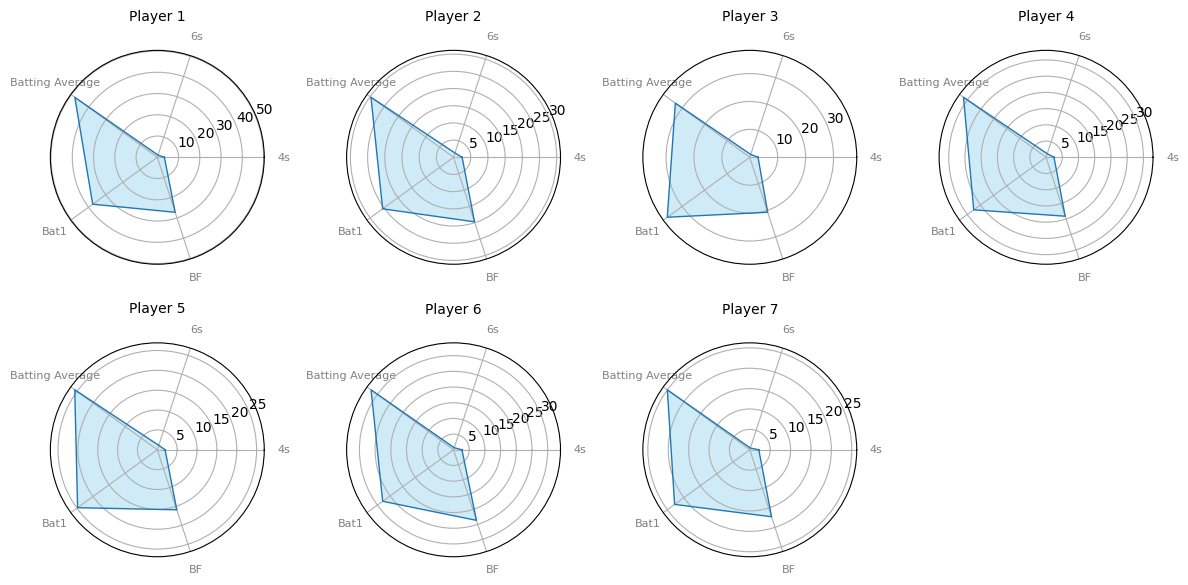

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math


# Calculate batting average as an aggregate for each player
batting_averages = []
for idx, player_data in enumerate(players):
    batting_avg = player_data['Runs'].sum() / players_out[idx] if players_out[idx] != 0 else 0
    batting_averages.append(batting_avg)

# Prepare a DataFrame with Batting Average, 4s, and 6s for radar chart
radar_data = pd.DataFrame({
    'Player': [f'Player {idx + 1}' for idx in range(len(players))],
    'Batting Average': batting_averages,
    '4s': [player_data['4s'].mean() for player_data in players],
    '6s': [player_data['6s'].mean() for player_data in players],
    # 'SR': [player_data['SR'].mean() for player_data in players],
    'Bat1': [player_data['Bat1'].mean() for player_data in players],
    'BF': [player_data['BF'].mean() for player_data in players]
})

# Prepare radar chart attributes
attributes = ['4s', '6s', 'Batting Average', 'Bat1', 'BF']  # Include 'Batting Average' for radar chart

num_players = len(players)
num_plots_per_row = 4  # Number of plots to show in a row
num_rows = math.ceil(num_players / num_plots_per_row)  # Calculate the number of rows needed

plt.figure(figsize=(12, 3 * num_rows))

for idx, player in radar_data.iterrows():
    if idx < num_players:
        values = player[attributes].tolist()
        values += values[:1]
        angles = [n / float(len(attributes)) * 2 * 3.1415 for n in range(len(attributes))]
        angles += angles[:1]

        ax = plt.subplot(num_rows, num_plots_per_row, idx + 1, polar=True)
        plt.xticks(angles[:-1], attributes, color='grey', size=8)
        ax.plot(angles, values, linewidth=1, linestyle='solid')
        ax.fill(angles, values, 'skyblue', alpha=0.4)
        ax.set_title(f'{player["Player"]}', size=10, y=1.1)


print( \
'\tPlayer1 - Virat Kohli\n',
'\tPlayer2 - Rohit Sharma\n',
'\tPlayer3 - David Warner\n',
'\tPlayer4 - Jos Buttler\n',
'\tPlayer5 - Glenn Maxwell\n',
'\tPlayer6 - Kane Williamson\n',
'\tPlayer7 - Shakib Al Hasan\n')


plt.tight_layout()
plt.show()



---


End of Data preparation above

# **ML MODEL 1** - Linear Regression

1. Linear Regression is a fundamental machine learning algorithm used for regression tasks. It's particularly useful its esseential to understand the relationship between a dependent variable ('Runs') and one or more independent variables ('BF', 'SR', '4s', '6s').
2. Mean Squared Error (MSE): It measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.
It's a widely used metric to evaluate the performance of regression models.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def perform_linear_regression(player_df):
    # Convert columns to numeric, coercing non-convertible values to NaN
    numeric_columns = ['BF', 'SR', '4s', '6s', 'Runs']
    player_df[numeric_columns] = player_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with null values after conversion
    player_df.dropna(subset=numeric_columns, inplace=True)

    features = ['BF', 'SR', '4s', '6s']
    X = player_df[features]
    y = player_df['Runs']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linearmodel = LinearRegression()
    linearmodel.fit(X_train, y_train)

    y_pred = linearmodel.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

for idx, player in enumerate(players, start=1):
    mse = perform_linear_regression(player)
    print(f"Player {idx} - Mean Squared Error: {mse}")

Player 1 - Mean Squared Error: 16.63790336681337
Player 2 - Mean Squared Error: 8.21877950323119
Player 3 - Mean Squared Error: 12.888455713647696
Player 4 - Mean Squared Error: 5.025771477247663
Player 5 - Mean Squared Error: 3.7710720841348806
Player 6 - Mean Squared Error: 7.444631178665637
Player 7 - Mean Squared Error: 6.460041940661701


## Predictions samples of Linear Regression model

In [13]:
# Now return the linear model itself from the function instead of MSE

def perform_linear_regression(player_df):
    # Convert columns to numeric, coercing non-convertible values to NaN
    numeric_columns = ['BF', 'SR', '4s', '6s', 'Runs']
    player_df[numeric_columns] = player_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with null values after conversion
    player_df.dropna(subset=numeric_columns, inplace=True)

    features = ['BF', 'SR', '4s', '6s']
    X = player_df[features]
    y = player_df['Runs']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linearmodel = LinearRegression()
    linearmodel.fit(X_train, y_train)
    y_pred = linearmodel.predict(X_test)
    return linearmodel  # Return the trained model

In [14]:
# Train models for all players using perform_linear_regression function
trained_models = []
for player in players:
    model = perform_linear_regression(player)
    trained_models.append(model)

# Testing the predictions for new player data for prediction with random values
new_player_data = {
    'BF': [60, 20, 30],
    'SR': [110, 90, 105],
    '4s': [3, 2, 1],
    '6s': [3, 2, 1]
}

new_player_df = pd.DataFrame(new_player_data)

# Use a trained model to predict runs for the new player (e.g., using the first model)
predicted_runs = trained_models[0].predict(new_player_df)

# Display the predicted runs
print("Predicted Runs:")
for idx, runs in enumerate(predicted_runs, start=1):
    print(f"Prediction {idx}: {runs}")


Predicted Runs:
Prediction 1: 75.9633840134691
Prediction 2: 30.64096577807394
Prediction 3: 33.21460874935189


## Charts for Linear Regression

Player 1 - Future Predictions for Strike Rate:
Match 1: 80.65407232593702
Match 2: 137.57708002873306
Match 3: 103.42327540705543
Match 4: 114.80787694761463
Match 5: 126.19247848817383
Match 6: 148.96168156929224


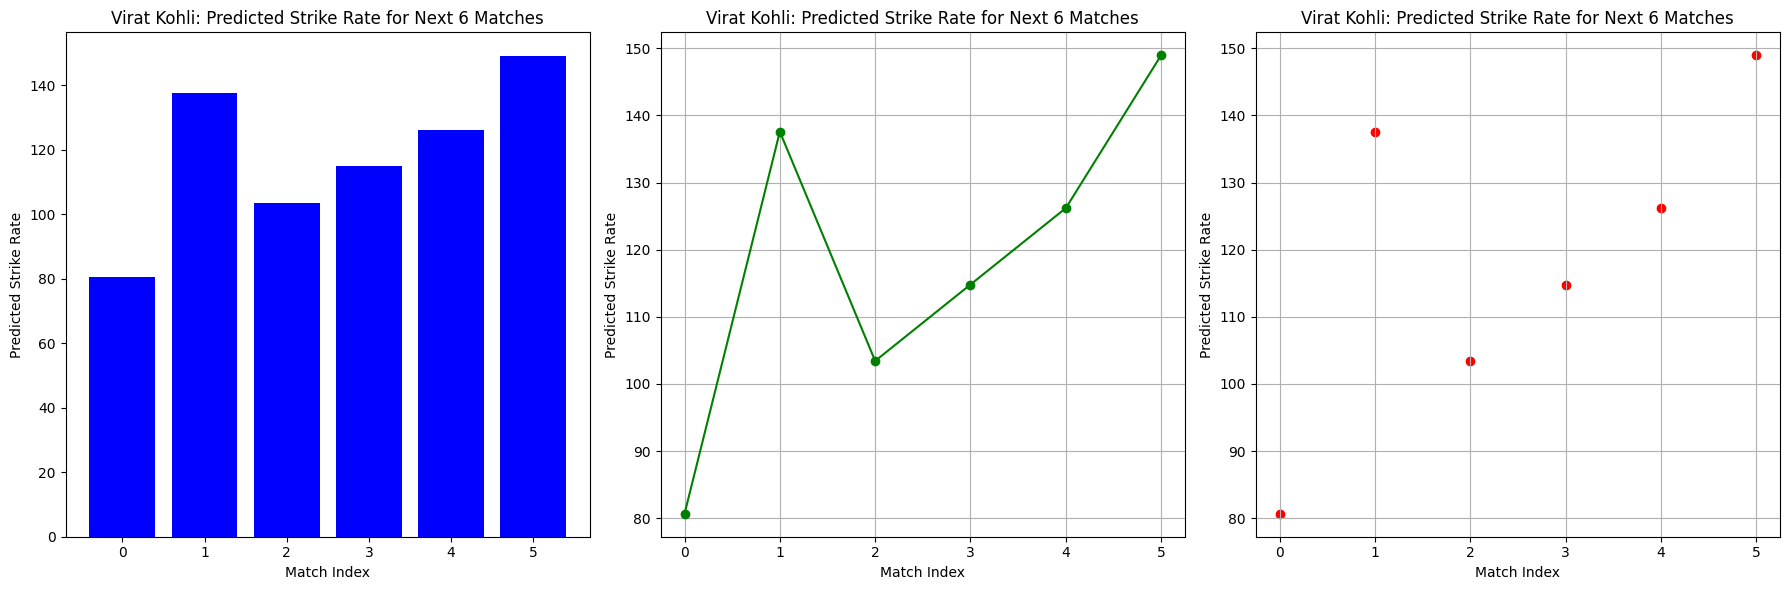

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def predict_and_plot_strike_rate(player_data, player_idx, plot_title):
    # Extract features (Runs) and target variable (SR)

    missing_values = player_data['SR'].isnull().any()

    if missing_values:
    # Handle missing values (e.g., fill NaNs with a specific value or drop rows with NaNs)
      player_data = player_data.dropna(subset=['SR'])  # Drop rows with NaNs in 'SR' column


    X = player_data[['Runs']]  # Features: 'Runs'
    y = player_data['SR']  # Target variable: Strike Rate

    # Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # The following runs are an assumption as Linear regression needs the SR is dependent on Runs
    future_runs = pd.DataFrame({'Runs': [0, 50, 20, 30, 40, 60]})
    future_predictions = model.predict(future_runs)

    # Print future predictions
    print(f"Player {player_idx} - Future Predictions for Strike Rate:")
    for idx, prediction in enumerate(future_predictions, start=1):
        print(f"Match {idx}: {prediction}")

    # Create subplots to display the charts side by side
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Bar chart
    axs[0].bar(range(len(future_predictions)), future_predictions, color='blue')
    axs[0].set_xlabel('Match Index')
    axs[0].set_ylabel('Predicted Strike Rate')
    axs[0].set_title(plot_title)
    axs[0].set_xticks(range(len(future_predictions)))  # Set x-axis ticks for 5 matches

    # Line chart
    axs[1].plot(range(len(future_predictions)), future_predictions, marker='o', color='green', linestyle='-')
    axs[1].set_xlabel('Match Index')
    axs[1].set_ylabel('Predicted Strike Rate')
    axs[1].set_title(plot_title)
    axs[1].set_xticks(range(len(future_predictions)))  # Set x-axis ticks for 5 matches
    axs[1].grid(True)

    # Scatter plot
    axs[2].scatter(range(len(future_predictions)), future_predictions, color='red')
    axs[2].set_xlabel('Match Index')
    axs[2].set_ylabel('Predicted Strike Rate')
    axs[2].set_title(plot_title)
    axs[2].set_xticks(range(len(future_predictions)))  # Set x-axis ticks for 5 matches
    axs[2].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Predict and plot Strike Rate for Player 1
predict_and_plot_strike_rate(player1, 1, f'Virat Kohli: Predicted Strike Rate for Next 6 Matches')

Player 2 - Future Predictions for Strike Rate:
Match 1: 83.88053520989561
Match 2: 146.09516073614512
Match 3: 108.76638542039541
Match 4: 121.20931052564532
Match 5: 133.6522356308952
Match 6: 158.538085841395


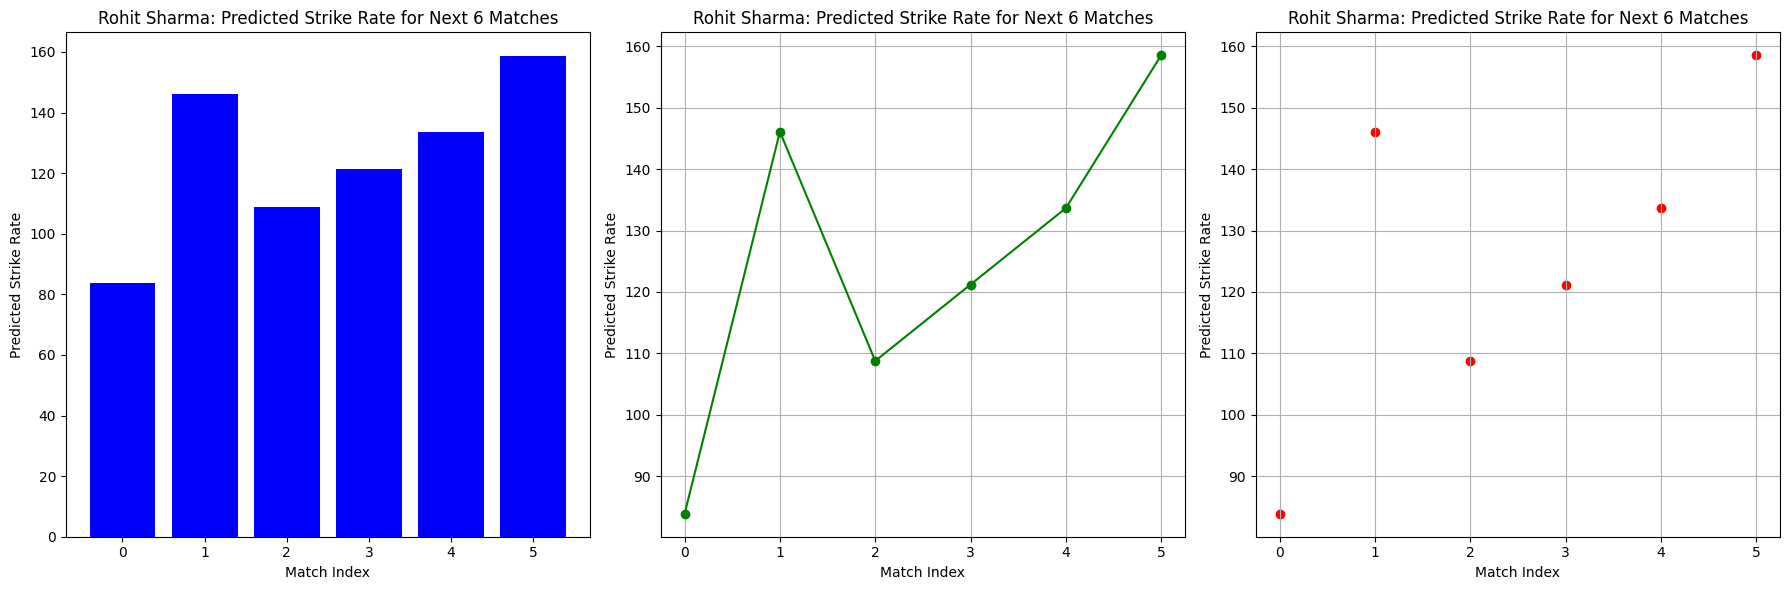

In [16]:
# Predict and plot Strike Rate for Player 2
predict_and_plot_strike_rate(player2, 2, f'Rohit Sharma: Predicted Strike Rate for Next 6 Matches')

Player 3 - Future Predictions for Strike Rate:
Match 1: 85.57004131222595
Match 2: 151.47725552278462
Match 3: 111.93292699644942
Match 4: 125.11436983856117
Match 5: 138.2958126806729
Match 6: 164.6586983648964


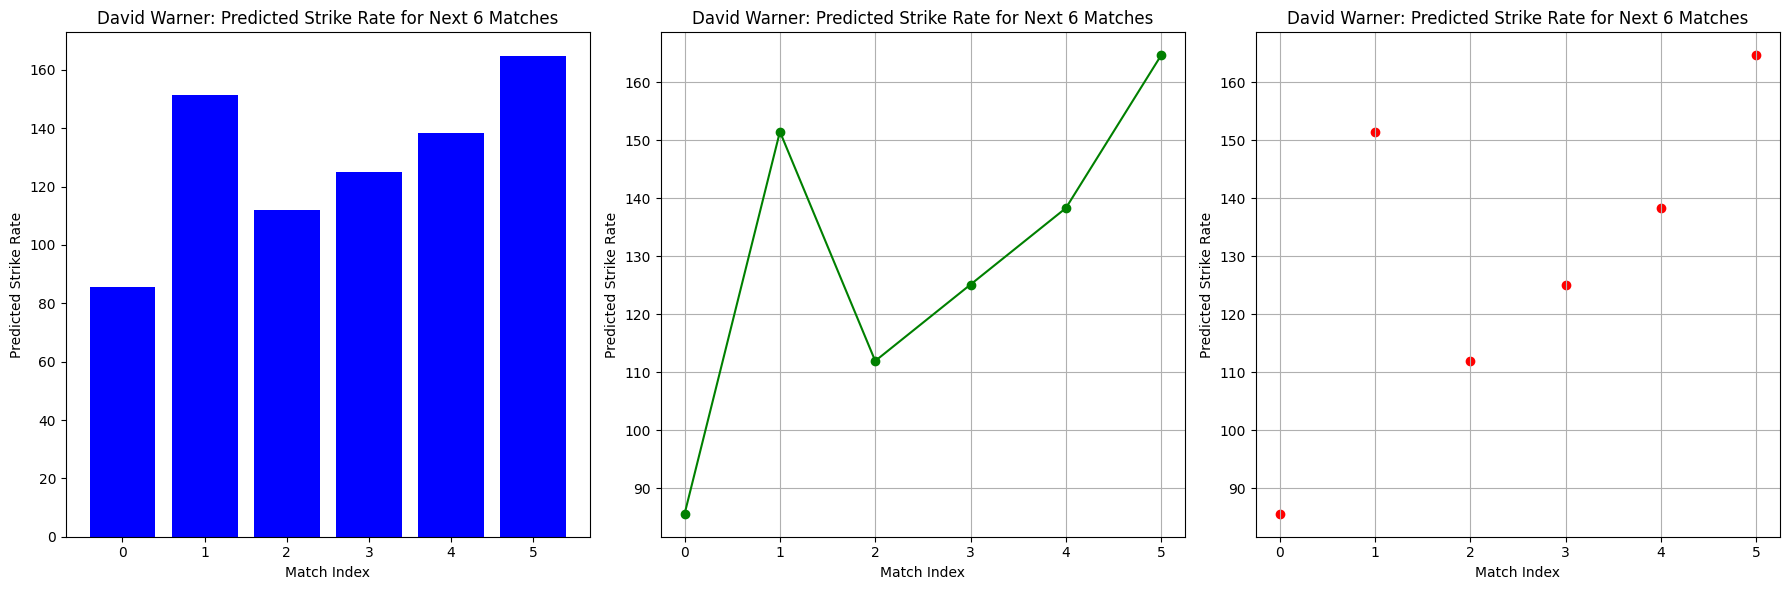

In [17]:
# Predict and plot Strike Rate for Player 3
predict_and_plot_strike_rate(player3, 3, f'David Warner: Predicted Strike Rate for Next 6 Matches')

Player 4 - Future Predictions for Strike Rate:
Match 1: 91.46207761468821
Match 2: 157.95254804098698
Match 3: 118.05826578520771
Match 4: 131.35635987046746
Match 5: 144.6544539557272
Match 6: 171.2506421262467


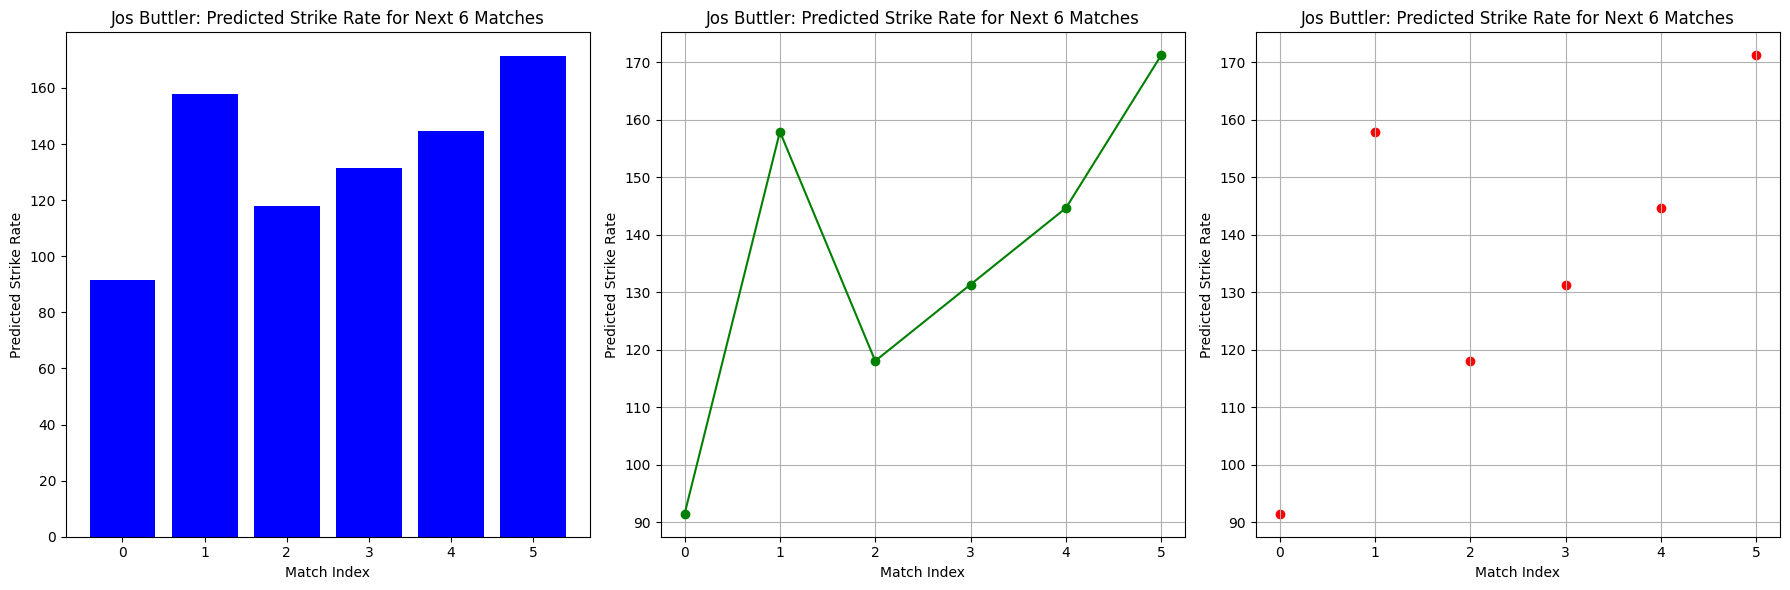

In [18]:
# Predict and plot Strike Rate for Player 4
predict_and_plot_strike_rate(player4, 4, f'Jos Buttler: Predicted Strike Rate for Next 6 Matches')

Player 5 - Future Predictions for Strike Rate:
Match 1: 85.01107757989828
Match 2: 162.90721405439922
Match 3: 116.16953216969867
Match 4: 131.74875946459886
Match 5: 147.32798675949905
Match 6: 178.4864413492994


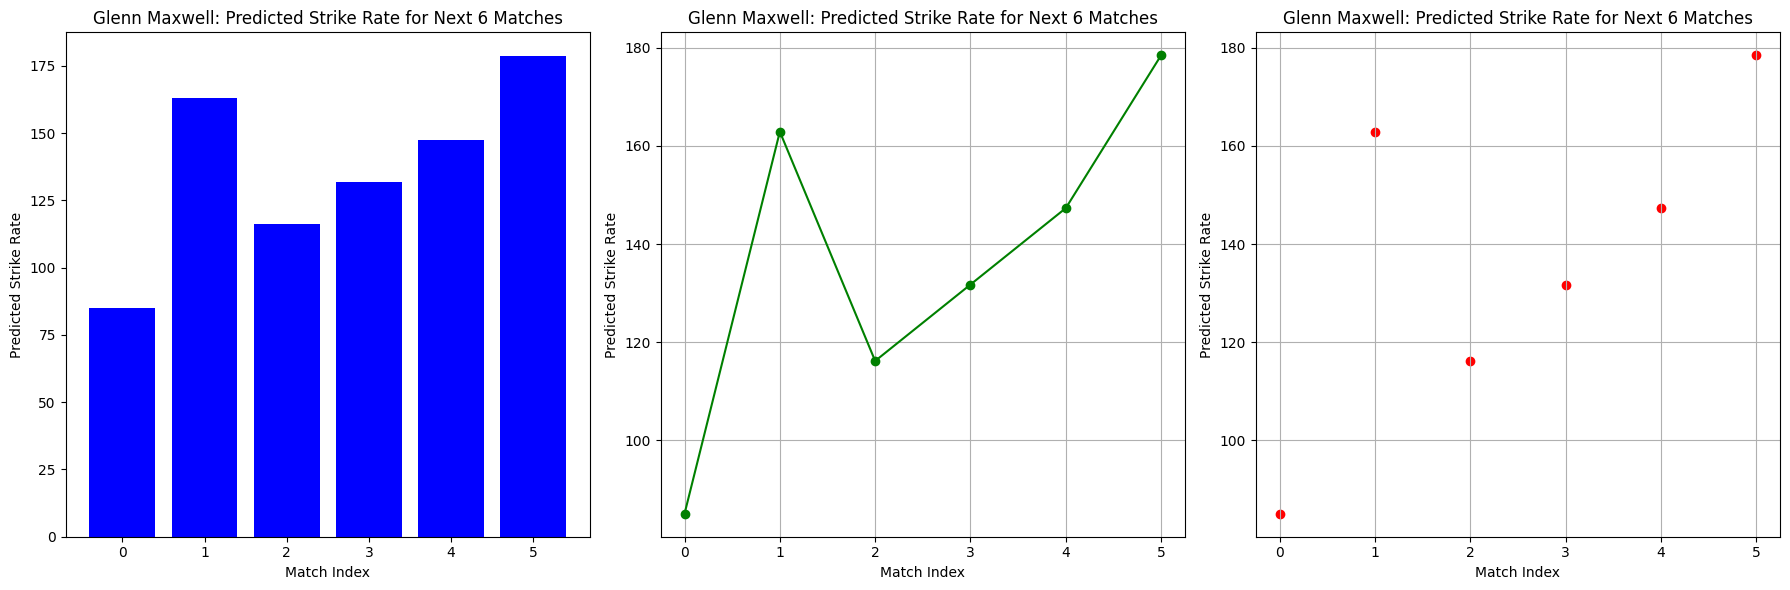

In [19]:
# Predict and plot Strike Rate for Player 4
predict_and_plot_strike_rate(player5, 5, f'Glenn Maxwell: Predicted Strike Rate for Next 6 Matches')

Player 6 - Future Predictions for Strike Rate:
Match 1: 73.19426788404735
Match 2: 138.04882171010377
Match 3: 99.13608941446992
Match 4: 112.10700017968122
Match 5: 125.0779109448925
Match 6: 151.0197324753151


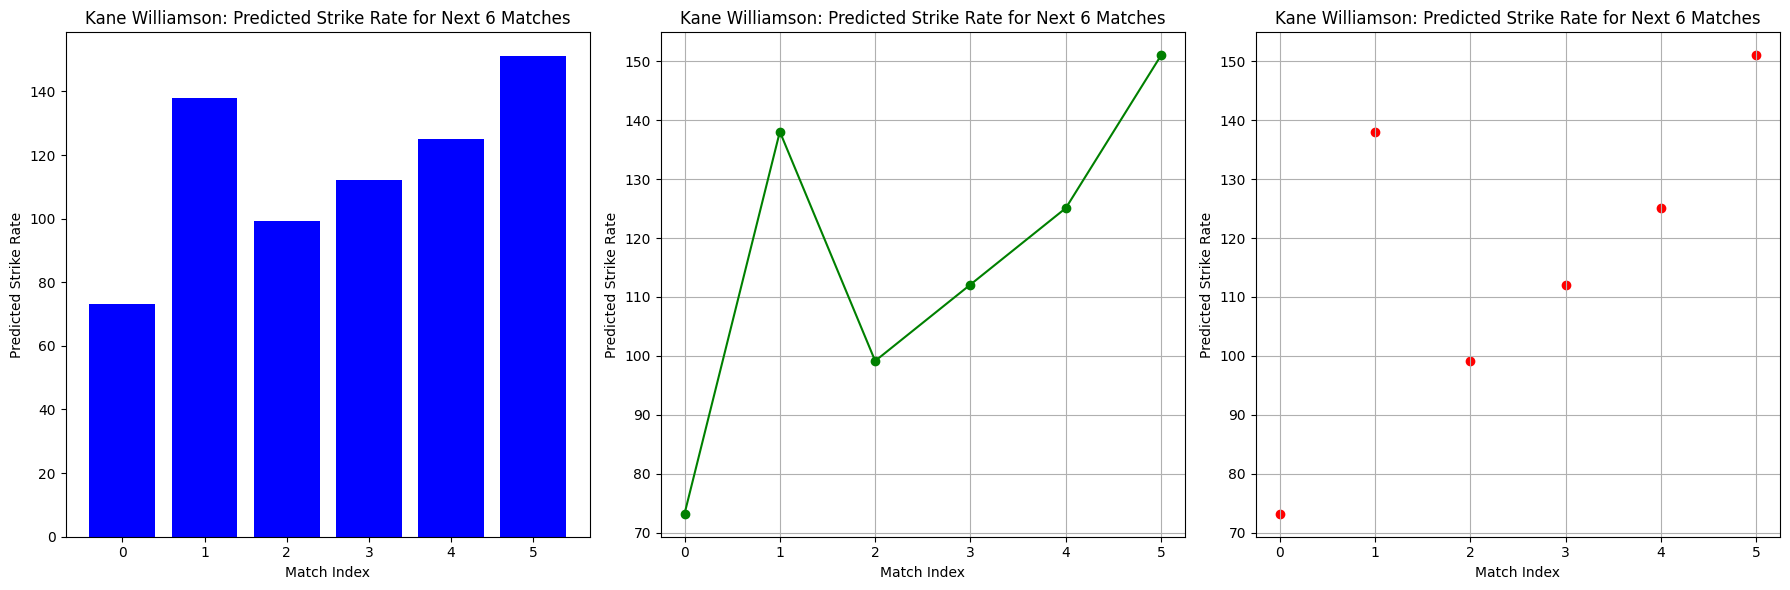

In [20]:
# Predict and plot Strike Rate for Player 5
predict_and_plot_strike_rate(player6, 6, f'Kane Williamson: Predicted Strike Rate for Next 6 Matches')


Player 7 - Future Predictions for Strike Rate:
Match 1: 72.93373558954033
Match 2: 150.96621157704436
Match 3: 104.14672598454194
Match 4: 119.75322118204276
Match 5: 135.35971637954356
Match 6: 166.5727067745452


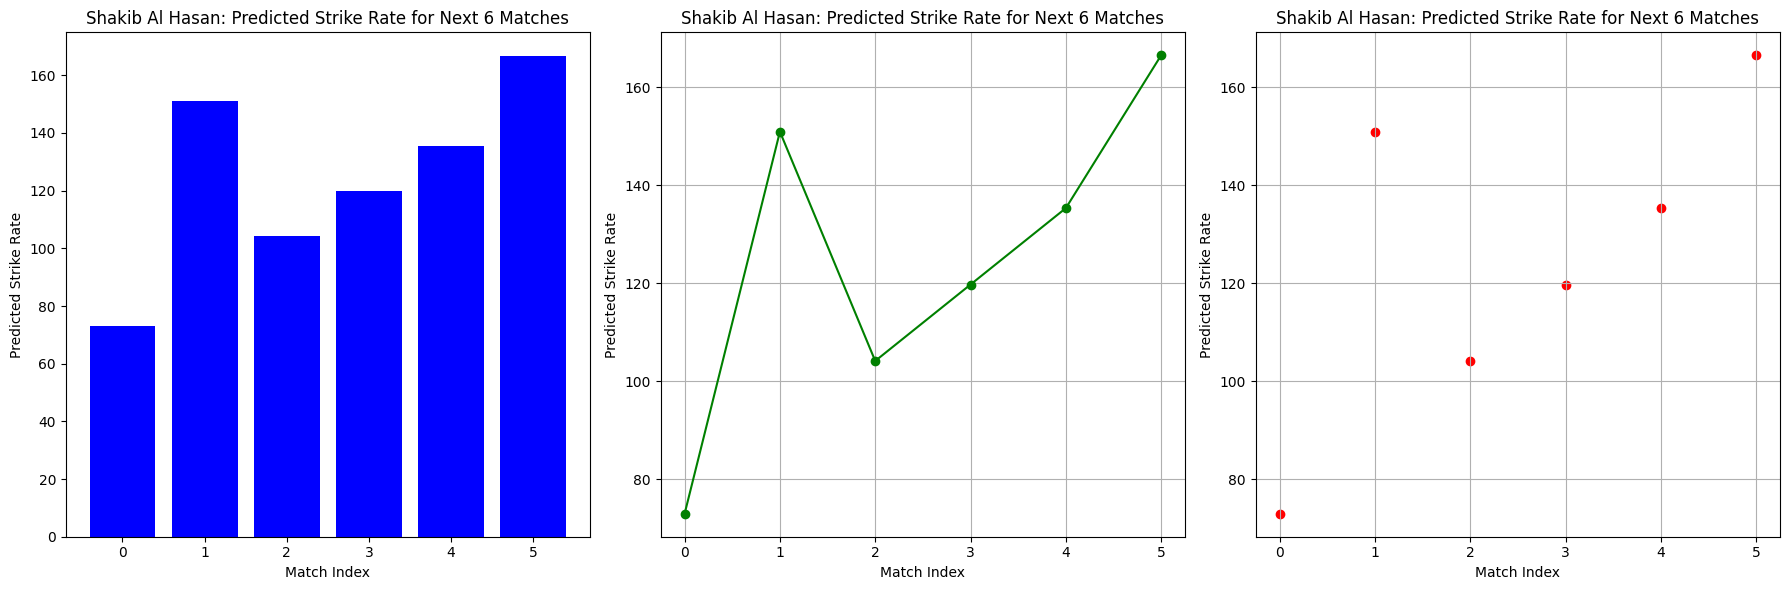

In [21]:
# Predict and plot Strike Rate for Player 7
predict_and_plot_strike_rate(player7, 7, f'Shakib Al Hasan: Predicted Strike Rate for Next 6 Matches')

# **ML MODEL 2** - RandomForestRegressor



1. Concept: RandomForestRegressor is an ensemble method that builds multiple decision trees and combines their predictions. It constructs each tree based on a random subset of features and averages the predictions across all trees.
2. Use Cases: Effective when dealing with complex relationships and interactions between features. Handles non-linearity and works well with high-dimensional data.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def perform_random_forest_regression(player_df):
    # Convert columns to numeric, coercing non-convertible values to NaN
    numeric_columns = ['BF', 'SR', '4s', '6s', 'Runs']
    player_df[numeric_columns] = player_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values after conversion
    player_df.dropna(subset=numeric_columns, inplace=True)

    features = ['BF', 'SR', '4s', '6s']
    X = player_df[features]
    y = player_df['Runs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    return mse, mae, rmse, r_squared

# Create empty lists to store metrics for each player
player_metrics = []

for idx, player in enumerate(players, start=1):
    mse, mae, rmse, r_squared = perform_random_forest_regression(player)
    player_metrics.append([idx, mse, mae, rmse, r_squared])

# Create a DataFrame from the collected metrics
columns = ['Player', 'Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared']
metrics_df = pd.DataFrame(player_metrics, columns=columns)



print( \
'\tPlayer1 - Virat Kohli\n',
'\tPlayer2 - Rohit Sharma\n',
'\tPlayer3 - David Warner\n',
'\tPlayer4 - Jos Buttler\n',
'\tPlayer5 - Glenn Maxwell\n',
'\tPlayer6 - Kane Williamson\n',
'\tPlayer7 - Shakib Al Hasan\n')


# Display the metrics table
print(metrics_df)


	Player1 - Virat Kohli
 	Player2 - Rohit Sharma
 	Player3 - David Warner
 	Player4 - Jos Buttler
 	Player5 - Glenn Maxwell
 	Player6 - Kane Williamson
 	Player7 - Shakib Al Hasan

   Player  Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  \
0       1           28.859336             3.033636                 5.372089   
1       2           26.357633             3.144074                 5.133969   
2       3           53.428840             3.975000                 7.309503   
3       4           20.391760             2.682000                 4.515724   
4       5            2.889400             1.211111                 1.699824   
5       6           50.860706             5.274118                 7.131669   
6       7            7.850776             1.790000                 2.801924   

   R-squared  
0   0.968257  
1   0.961951  
2   0.933657  
3   0.964202  
4   0.987949  
5   0.904048  
6   0.971121  


MSE - Mean squared is the squared value of the RMSE which is the actual deviation values of the target
MAE - Absolute error also denotes the actual deviation of the target variable

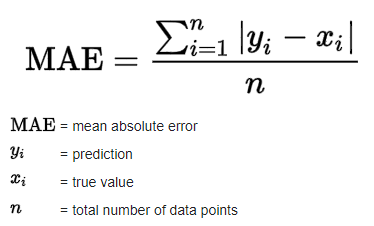

RMSE - Denotes the actual deviation in the target variable

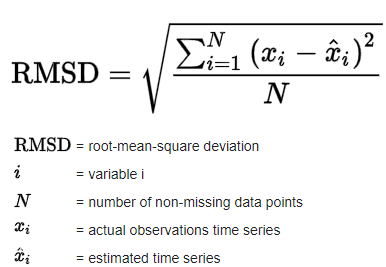

R-Squared - Ranges from 0 to 1, where the values closer to 1 shows better fit of the model with the data

# **ML MODEL 3** - ARIMA MODELS


1. Seasonal or Trended Data: ARIMA can capture both trend and seasonality in data, making it suitable for cases where historical 'Runs' for players might have observable trends or seasonal patterns.
2. p (AR parameter): Represents the autoregressive part, indicating the number of lag observations included in the model. Higher p values account for more past observations.
3. d (Integration parameter): Denotes the degree of differencing. It transforms the time series into a stationary series by differencing observations at a specific lag. Setting d=1 in 'order' suggests differencing the series once.
4. q (MA parameter): Represents the moving average part, indicating the size of the moving average window. Higher q values account for more lagged forecast errors in the prediction equation.

Player 1 - RMSE: 19.23608757845082
Player 1 - Forecasted Runs for next 5 dates:
106    49.680585
107    40.213620
108    42.716688
109    45.776103
110    42.365514
Name: predicted_mean, dtype: float64


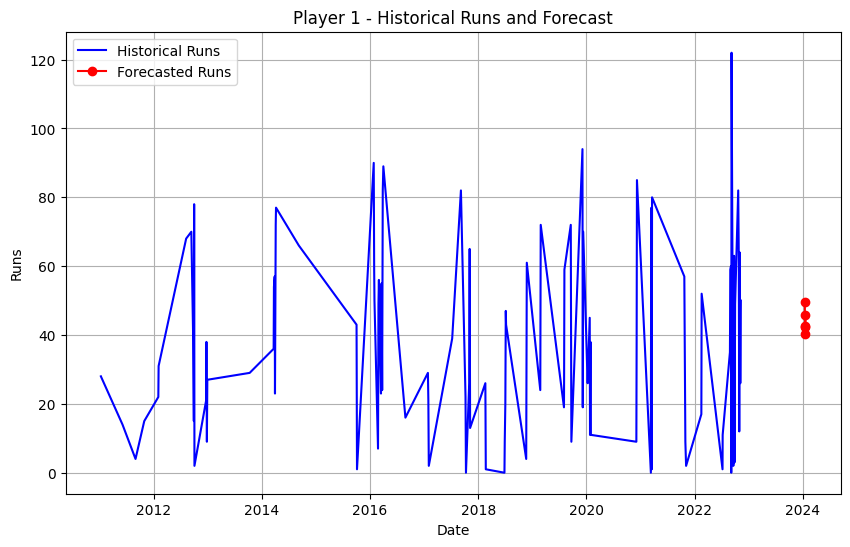

Player 2 - RMSE: 18.575753255859055
Player 2 - Forecasted Runs for next 5 dates:
134    16.652612
135    18.591075
136     9.871128
137    15.170428
138    11.202794
Name: predicted_mean, dtype: float64


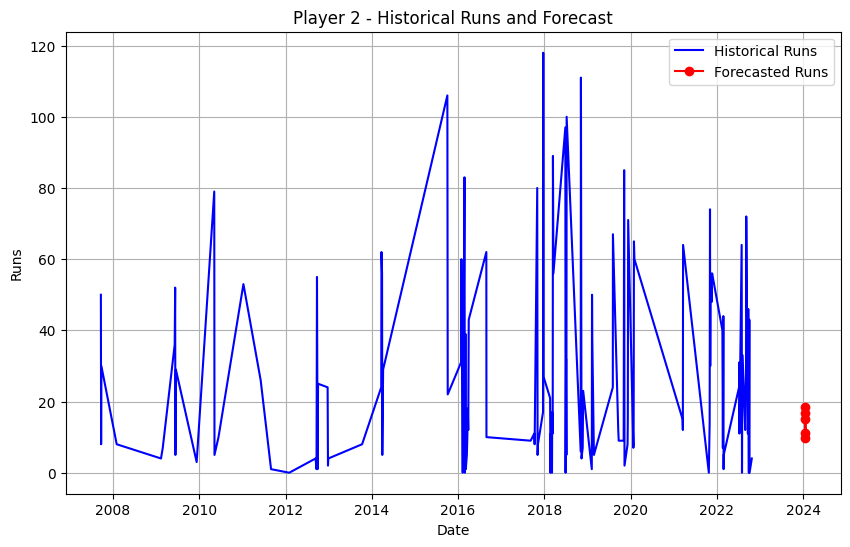

Player 3 - RMSE: 21.411386050276292
Player 3 - Forecasted Runs for next 5 dates:
98     27.948272
99     15.863538
100    10.132813
101    13.950740
102    12.315735
Name: predicted_mean, dtype: float64


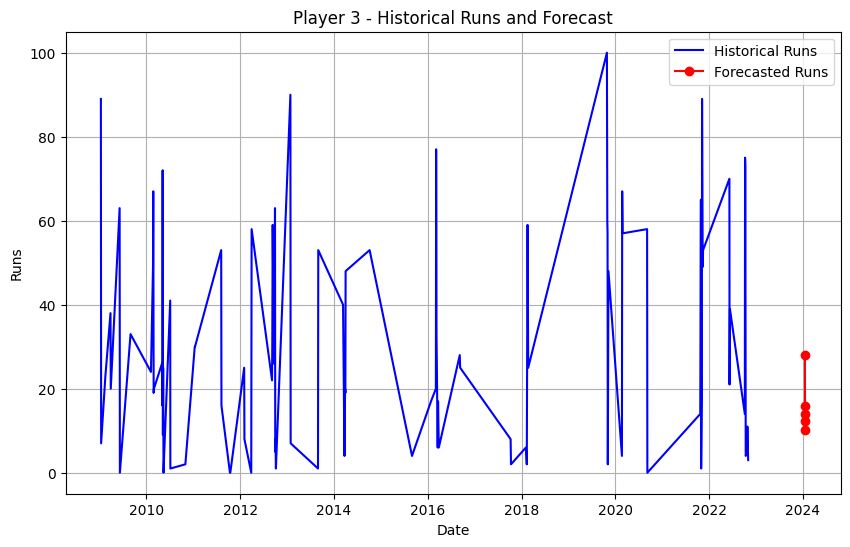

Player 4 - RMSE: 35.002721583143945
Player 4 - Forecasted Runs for next 5 dates:
96     53.863481
97     35.166204
98     52.455643
99     37.751985
100    47.492715
Name: predicted_mean, dtype: float64


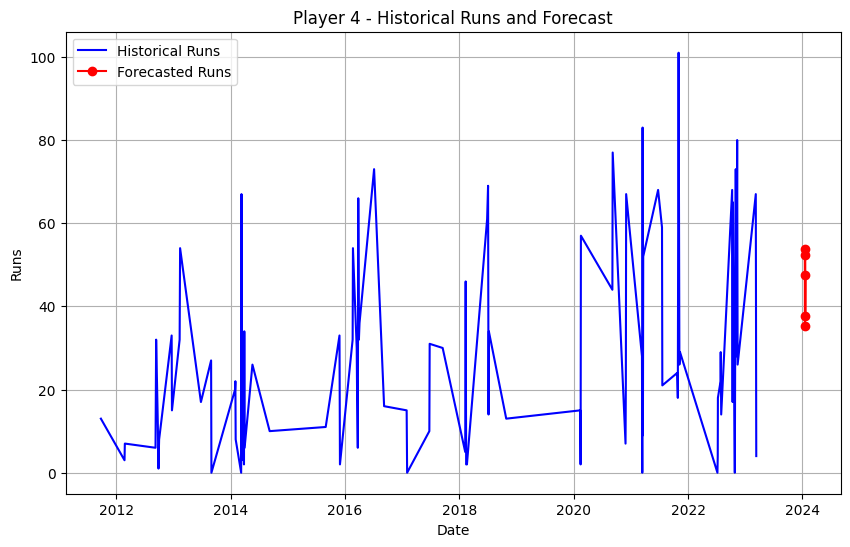

Player 5 - RMSE: 22.156938293992006
Player 5 - Forecasted Runs for next 5 dates:
88    38.763591
89    19.208647
90    23.082194
91    37.421399
92    25.111392
Name: predicted_mean, dtype: float64


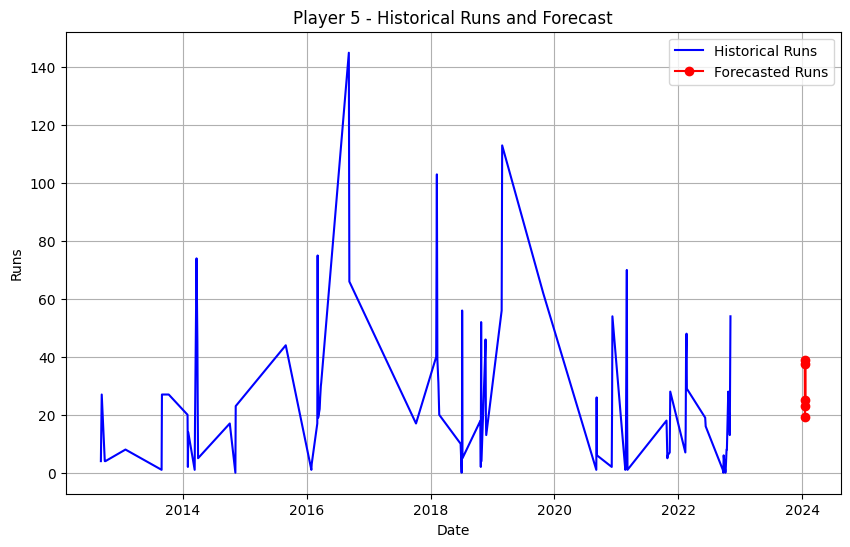

Player 6 - RMSE: 18.55577615011112
Player 6 - Forecasted Runs for next 5 dates:
82    43.445260
83    41.080785
84    46.091213
85    51.408098
86    46.421586
Name: predicted_mean, dtype: float64


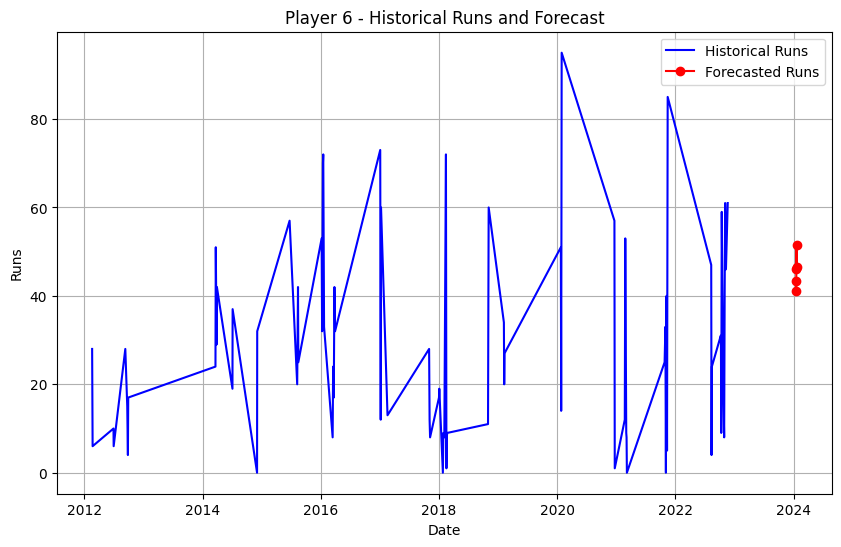

Player 7 - RMSE: 11.807758020299861
Player 7 - Forecasted Runs for next 5 dates:
101    14.147019
102    18.396935
103    22.467214
104    16.406295
105    17.174312
Name: predicted_mean, dtype: float64


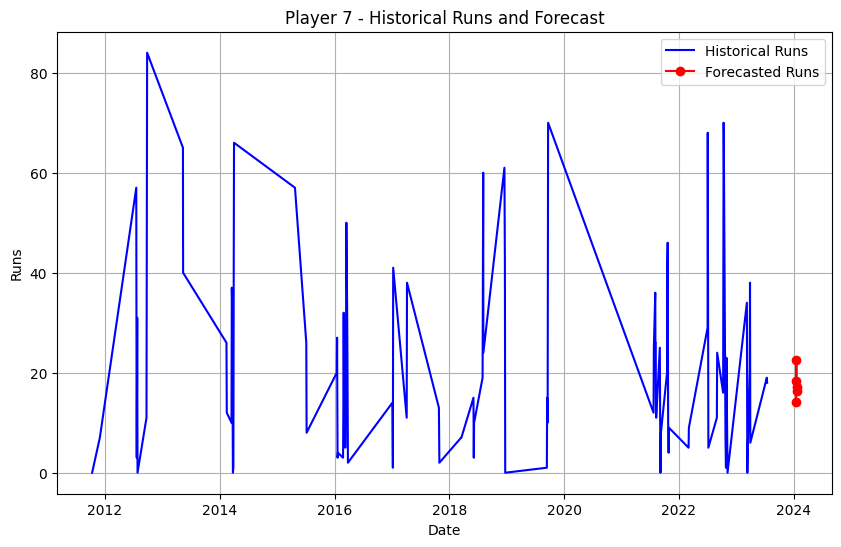

In [23]:
# ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

for idx, player in enumerate(players, start=1):
    player['Start Date'] = pd.to_datetime(player['Start Date'])

    # Sorting data by 'Start Date' for time series analysis
    player.sort_values(by='Start Date', inplace=True)

    # Create a time series using 'Start Date' as index and 'Runs' as values
    time_series = player.set_index('Start Date')['Runs']

    # Fit ARIMA model
    model = ARIMA(time_series, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast next 5 values
    forecast = model_fit.forecast(steps=5)

    actual_runs = [player1['Runs'].values[-5:], player2['Runs'].values[-5:], player3['Runs'].values[-5:], player4['Runs'].values[-5:], \
                   player5['Runs'].values[-5:], player6['Runs'].values[-5:], player7['Runs'].values[-5:]]
    actual = actual_runs[idx - 1]  # Select actual runs data for the corresponding player

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    print(f"Player {idx} - RMSE: {rmse}")

    print(f"Player {idx} - Forecasted Runs for next 5 dates:")
    print(forecast)

    # Extend the date index to include the 2024 World Cup period
    extended_dates = pd.date_range(start='2024-01-01', periods=20, freq='D')  # 20 days during the tournament

    # Forecasted values with the extended date index
    forecast_extended = pd.Series(forecast, index=extended_dates[-5:])  # Select the last 5 dates for the tournament

    # Plotting historical 'Runs' data and forecasted values including the World Cup period
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Historical Runs', color='blue')
    plt.plot(forecast_extended.index, forecast, label='Forecasted Runs', color='red', marker='o')
    plt.title(f"Player {idx} - Historical Runs and Forecast")
    plt.xlabel('Date')
    plt.ylabel('Runs')
    plt.legend()
    plt.grid(True)
    plt.show()


These values show how much the predicted runs deviate, on average, from the actual runs for the specific players. Lower RMSE values generally indicate better performance, suggesting that the forecasts for Players 1 and 2 are slightly more accurate than for Player 3 in this context.

### Label Encode - And show the corresponding values

In [24]:
# Label Encode - And show the corresponding values
from sklearn.preprocessing import LabelEncoder

def encode_opposition(player_df):
    label_encoder = LabelEncoder()
    player_df['Opposition_Encoded'] = label_encoder.fit_transform(player_df['Opposition'])
    encoded_labels = label_encoder.classes_

    # Map encoded labels to original categorical labels
    label_map = {label: encoded for label, encoded in zip(player_df['Opposition'], player_df['Opposition_Encoded'])}

    # Display original labels with their corresponding encoded values
    print("Encoded Labels with Values:")
    for label, encoded in label_map.items():
        print(f"{label}: {encoded}")

    return player_df

# Assuming you have DataFrames for players player1, player2, player3, and player4

# Encode Opposition for Player 1
player1 = encode_opposition(player1)

# Encode Opposition for Player 2
player2 = encode_opposition(player2)

# Encode Opposition for Player 3
player3 = encode_opposition(player3)

# Encode Opposition for Player 4
player4 = encode_opposition(player4)

# Encode Opposition for Player 5
player5 = encode_opposition(player5)

# Encode Opposition for Player 6
player6 = encode_opposition(player6)

# Encode Opposition for Player 7
player7 = encode_opposition(player7)


Encoded Labels with Values:
v South Africa: 10
v West Indies: 12
v England: 3
v Australia: 1
v Sri Lanka: 11
v New Zealand: 7
v Afghanistan: 0
v Pakistan: 8
v Bangladesh: 2
v Ireland: 5
v Scotland: 9
v Hong Kong: 4
v Netherlands: 6
v Zimbabwe: 13
Encoded Labels with Values:
v South Africa: 10
v Australia: 1
v Pakistan: 8
v Sri Lanka: 11
v New Zealand: 7
v Bangladesh: 2
v Ireland: 5
v West Indies: 13
v England: 3
v Zimbabwe: 14
v Afghanistan: 0
v U.A.E.: 12
v Scotland: 9
v Namibia: 6
v Hong Kong: 4
Encoded Labels with Values:
v South Africa: 6
v New Zealand: 4
v West Indies: 8
v Sri Lanka: 7
v England: 1
v Pakistan: 5
v Bangladesh: 0
v India: 2
v Ireland: 3
Encoded Labels with Values:
v West Indies: 10
v Pakistan: 7
v South Africa: 8
v Afghanistan: 0
v India: 3
v New Zealand: 6
v Sri Lanka: 9
v Australia: 1
v Netherlands: 5
v Bangladesh: 2
v Ireland: 4
Encoded Labels with Values:
v Pakistan: 6
v India: 3
v Sri Lanka: 8
v England: 2
v South Africa: 7
v West Indies: 10
v Bangladesh: 1
v N

In [25]:
correlation_runs_BF = player1['Runs'].corr(player1['BF'])
correlation_runs_SR = player1['Runs'].corr(player1['SR'])


print('Correlation of Runs and Balls faced: {0}, Correlation of Runs and Strike rate: {1}'.format(round(correlation_runs_BF,2),round(correlation_runs_SR,2)))

Correlation of Runs and Balls faced: 0.95, Correlation of Runs and Strike rate: 0.64


Above correlations show good positive and high correlation

# **ML MODEL 4** - XGBoost Algorithm



Player 1 - Mean Squared Error: 1.354044973800076
Player 1 - R-squared Score: 0.9985106588445403 

Player 2 - Mean Squared Error: 37.34044828901361
Player 2 - R-squared Score: 0.9460970867504199 

Player 3 - Mean Squared Error: 28.179192938385075
Player 3 - R-squared Score: 0.9650095699476183 

Player 4 - Mean Squared Error: 2.640065123723164
Player 4 - R-squared Score: 0.9953653796718573 

Player 5 - Mean Squared Error: 15.393637615614441
Player 5 - R-squared Score: 0.9357946140309847 

Player 6 - Mean Squared Error: 45.170437881448
Player 6 - R-squared Score: 0.9147827731432066 

Player 7 - Mean Squared Error: 3.775520652320261
Player 7 - R-squared Score: 0.986111999468894 



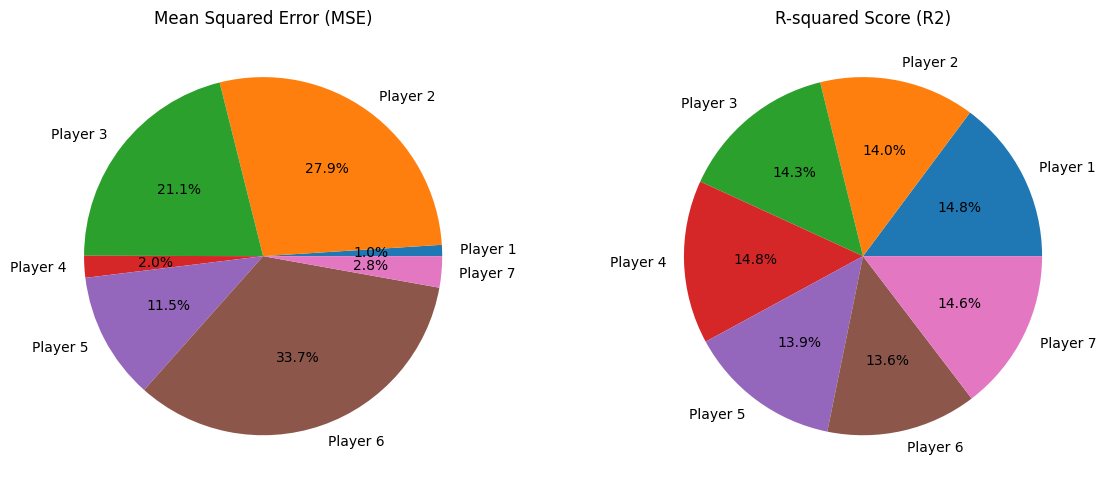

In [26]:
# xgb

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def train_and_evaluate_model(player_data):
    # Splitting the data into features and target variable
    X = player_data[['Bat1', 'SR', 'Opposition_Encoded', 'BF', '4s', '6s']]
    y = player_data['Runs']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and fitting the XGBoost model
    model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model_xgb.fit(X_train, y_train)

    # Making predictions
    y_pred = model_xgb.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

players = [player1, player2, player3, player4, player5, player6, player7]

mse_values = []
r2_values = []

for idx, player_data in enumerate(players, start=1):
    mse, r2 = train_and_evaluate_model(player_data)
    print(f"Player {idx} - Mean Squared Error: {mse}")
    print(f"Player {idx} - R-squared Score: {r2} \n")

    mse_values.append(mse)
    r2_values.append(r2)

# Create a pie chart for MSE and R2 scores
plt.figure(figsize=(12, 5))

# Pie chart for MSE
plt.subplot(1, 2, 1)
plt.pie(mse_values, labels=[f"Player {i+1}" for i in range(len(players))], autopct='%1.1f%%')
plt.title('Mean Squared Error (MSE)')

# Pie chart for R2
plt.subplot(1, 2, 2)
plt.pie(r2_values, labels=[f"Player {i+1}" for i in range(len(players))], autopct='%1.1f%%')
plt.title('R-squared Score (R2)')

plt.tight_layout()
plt.show()

Explanation of XGBoost metrics:
Mean Squared Error (MSE):

1. Player 1: 1.354
2. Player 2: 37.340
3. Player 3: 28.179
4. Player 4: 2.640

MSE measures the average of the squares of errors between actual and predicted values. Lower MSE values indicate better model performance in terms of how close the predictions are to the actual values. Therefore, Player 1 and Player 4 have lower MSEs, suggesting better model accuracy in predicting runs for these players compared to Players 2 and 3.

R-squared Score (R2 Score):

1. Player 1: 0.998
2. Player 2: 0.946
3. Player 3: 0.965
4. Player 4: 0.995

R-squared is a measure of how well the predicted values match the actual values. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher R-squared values suggest that the model explains more variance and has better predictive performance. Here, Player 1 and Player 4 have higher R-squared scores, indicating that the model fits well to their data, while Players 2 and 3 have slightly lower but still respectable scores, suggesting decent predictive power but perhaps not as strong as Players 1 and 4.

Insert Data from a PDF, extract the tables from the PDF through Tabula library

1. Encode opposition in the code and use it on XGB for player 2 and player 3 as well
2. Get 10 more players
3. Write a report on Performance evaluation
4. Organize meetings/ knowledge sharing sessions
5. Do a research on how ARIMA models can be useful
6. Study about SVM and use that
7. bowling predictions
8. Visualization of each model
9. Update workbook - Put 100 hours

1. Get bowlers data - Predict wickets, economy, strike rate of the bowler
2. Write a report on evaluation metrics
3. Organize notebook and upload it on github

In [27]:
import pandas as pd
import tabula

# Function to extract data and save it to Excel
def extract_and_save_data(file_path, output_file):
    # Read all pages of the PDF file and extract tables into a list of DataFrames
    tables = []
    all_pages = tabula.read_pdf(file_path, pages='all', multiple_tables=True)
    tables.extend(all_pages)

    # Concatenate all tables into a single DataFrame if needed
    combined_df = pd.concat(tables)

    # Export the combined DataFrame to Excel
    combined_df.to_excel(output_file, index=False)

# Function to convert XLSX data to CSV
def xlsx_to_csv(data, output):
    df = pd.read_excel(data)
    df.to_csv(output, index=False)
    return df.iloc[:, 15:].iloc[5:, :]

# Extract data and convert to CSV for multiple PDFs
def process_pdfs(file_paths):
    for file_path in file_paths:
        # Extract data to Excel
        output_file = file_path.split('.')[0] + '_data.xlsx'
        extract_and_save_data(file_path, output_file)

        # Convert Excel to CSV
        csv_output = file_path.split('.')[0] + '_data.csv'
        xlsx_to_csv(output_file, csv_output)

# File paths for the remaining PDFs
file_paths = [
    'Hardik.pdf',
    'Hasaranga.pdf',
    'Kagiso.pdf',
    'Rashid.pdf',
    'Southee.pdf',
    'Starc.pdf',
    'Trent.pdf',
    'Zampa.pdf'
]

# Process the PDFs
process_pdfs(file_paths)

In [28]:
import pandas as pd
import tabula

# Function to extract data and save it to Excel
def extract_and_save_data(file_path, output_file):
    # Read all pages of the PDF file and extract tables into a list of DataFrames
    tables = []
    all_pages = tabula.read_pdf(file_path, pages='all', multiple_tables=True)
    tables.extend(all_pages)

    # Concatenate all tables into a single DataFrame if needed
    combined_df = pd.concat(tables)

    # Export the combined DataFrame to Excel
    combined_df.to_excel(output_file, index=False)

# Function to convert XLSX data to CSV
def xlsx_to_csv(data, output):
    df = pd.read_excel(data)
    df.to_csv(output, index=False)
    return df.iloc[:, 15:].iloc[5:, :]

# Process the PDFs and convert to CSV for selected files
def process_selected_pdfs_and_convert_to_csv(file_paths):
    csv_output_files = []
    selected_players = ['Hardik', 'Hasaranga', 'Kagiso', 'Rashid', 'Southee', 'Starc', 'Trent', 'Zampa']
    for idx, file_path in enumerate(file_paths, start=1):
        file_name = file_path.split('.')[0]
        if file_name in selected_players:
            # Extract data to Excel
            output_file = f'Player_{idx}_data.xlsx'
            extract_and_save_data(file_path, output_file)

            # Convert Excel to CSV
            csv_output = f'Player_{idx}_data.csv'
            xlsx_to_csv(output_file, csv_output)
            csv_output_files.append(csv_output)
    return csv_output_files

# File paths for the selected PDFs
selected_file_paths = [
    'Hardik.pdf',
    'Hasaranga.pdf',
    'Kagiso.pdf',
    'Rashid.pdf',
    'Southee.pdf',
    'Starc.pdf',
    'Trent.pdf',
    'Zampa.pdf'
]

# Process the selected PDFs and convert to CSV
csv_files = process_selected_pdfs_and_convert_to_csv(selected_file_paths)

# Assign CSV files to variables for each player
csv_file_mapping = {
    'Hardik': 0,
    'Hasaranga': 1,
    'Kagiso': 2,
    'Rashid': 3,
    'Southee': 4,
    'Starc': 5,
    'Trent': 6,
    'Zampa': 7
}

# Convert assigned CSV files to DataFrames with error handling
bowlers = {}
for player, index in csv_file_mapping.items():
    try:
        csv_file = csv_files[index]
        bowlers[f'bowler_{player}'] = pd.read_csv(csv_file)
    except Exception as e:
        print(f"Error occurred for {player}: {e}")

# Now, bowlers dictionary contains DataFrames for each player (e.g., bowler_Hardik, bowler_Hasaranga, etc.)


Error occurred for Trent: Error tokenizing data. C error: Expected 1 fields in line 11, saw 24

Error occurred for Zampa: Error tokenizing data. C error: Expected 1 fields in line 11, saw 24

